In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [5]:
path = r'..\..\dataset_for_machine_learning\kc_house_data.csv'

df = pd.read_csv(path)

df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [7]:
df = df.drop(['id','date',], axis = 1)

In [8]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


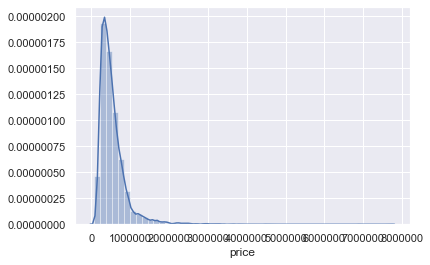

In [10]:
fig,ax = plt.subplots()
sns.distplot(df['price'])

In [11]:
q = df['price'].quantile(0.99)
df = df[df['price'] < q]

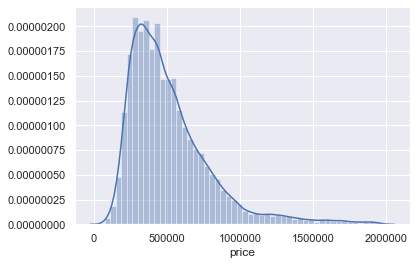

In [12]:
fig,ax = plt.subplots()
sns.distplot(df['price'])

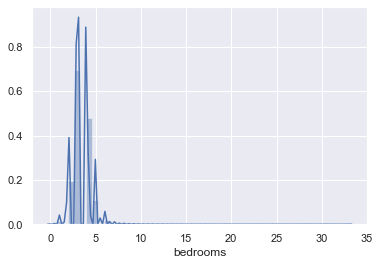

In [13]:
fig,ax = plt.subplots()
sns.distplot(df['bedrooms'])

In [14]:
df[df['bedrooms'].apply(lambda x: x == 10) ].sort_values('sqft_living', ascending = True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19254,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
15161,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
13314,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400


In [15]:
df[df['bedrooms'].apply(lambda x: x < 2) ].sort_values('sqft_living', ascending = True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,276000.0,1,0.75,370,1801,1.0,0,0,5,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,245000.0,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
21332,245000.0,1,1.00,390,2000,1.0,0,0,4,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
13843,550000.0,1,1.00,2880,7560,1.0,0,0,3,7,1440,1440,1925,2014,98126,47.5370,-122.375,1400,5040
1653,415000.0,1,2.00,3000,204732,2.5,0,2,3,8,3000,0,1979,0,98014,47.6331,-121.945,2330,213008
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000


In [16]:
df[df['sqft_living']/ df['bedrooms'] < 500]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
12,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21584,380000.0,3,2.50,1260,900,2.0,0,0,3,7,940,320,2007,0,98116,47.5621,-122.384,1310,1415
21592,475000.0,3,2.25,1190,1200,3.0,0,0,3,8,1190,0,2008,0,98103,47.6542,-122.346,1180,1224
21601,467000.0,3,2.50,1425,1179,3.0,0,0,3,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
21604,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230


In [17]:
df = df[df['sqft_living']/ df['bedrooms'] > 300]

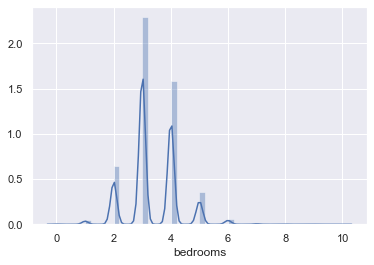

In [18]:
fig,ax = plt.subplots()
sns.distplot(df['bedrooms'])

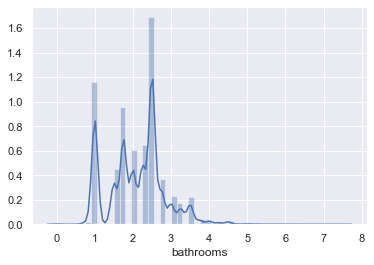

In [19]:
fig,ax = plt.subplots()
sns.distplot(df['bathrooms'])

In [20]:
df[df['bathrooms']  > df['bedrooms'] + 2]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8477,339950.0,0,2.5,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,240000.0,0,2.5,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
12653,320000.0,0,2.5,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [21]:
q = df['bathrooms'].quantile(0.99)
df = df[df['bathrooms'] < q]

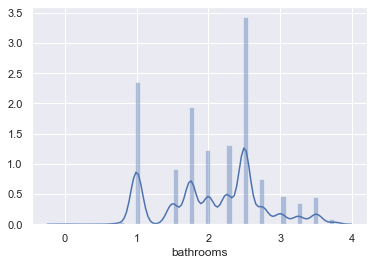

In [22]:
fig,ax = plt.subplots()
sns.distplot(df['bathrooms'])

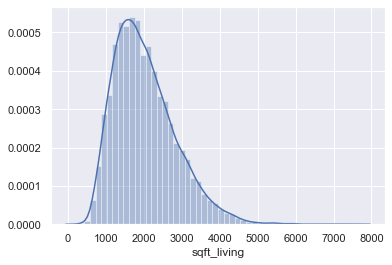

In [23]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_living'])

In [24]:
q = df['sqft_living'].quantile(0.99)
df = df[df['sqft_living'] < q]

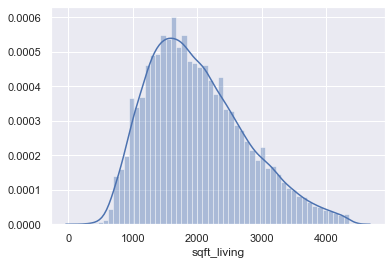

In [25]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_living'])

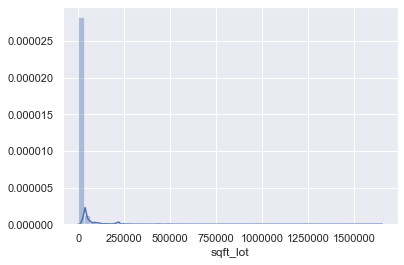

In [26]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_lot'])

In [27]:
df[df['sqft_living'].apply(lambda x: x > 400) ].sort_values('sqft_lot', ascending = False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,700000.0,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
17319,190000.0,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730
7647,542500.0,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
7769,855000.0,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
3949,998000.0,4,3.25,3770,982998,2.0,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20604,256950.0,2,2.00,1070,635,2.0,0,0,3,9,720,350,2008,0,98106,47.5212,-122.357,1070,928
3452,1234570.0,2,2.50,2470,609,3.0,0,0,3,11,1910,560,2011,0,98112,47.6182,-122.312,2440,1229
7589,367500.0,2,2.00,1030,600,2.0,0,0,3,8,680,350,2004,0,98116,47.5788,-122.410,1120,1267
5826,250000.0,3,2.25,1050,572,2.0,0,0,3,7,740,310,2006,0,98106,47.5549,-122.363,1260,1062


In [28]:
q = df['sqft_lot'].quantile(0.99)
df = df[df['sqft_lot'] < q]

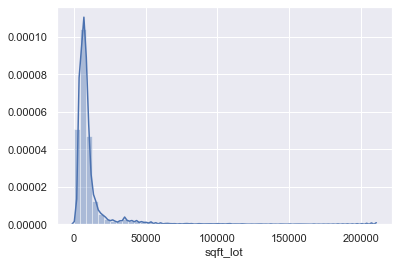

In [29]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_lot'])

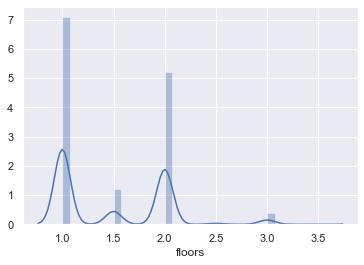

In [30]:
fig,ax = plt.subplots()
sns.distplot(df['floors'])

In [31]:
q = df['floors'].quantile(0.99)
df = df[df['floors'] < q]

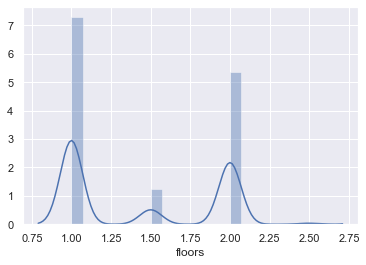

In [32]:
fig,ax = plt.subplots()
sns.distplot(df['floors'])

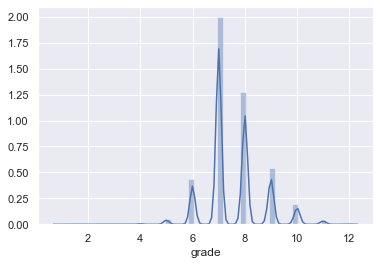

In [33]:
fig,ax = plt.subplots()
sns.distplot(df['grade'])

In [34]:
q = df['grade'].quantile(0.01)
df = df[df['grade'] > q]

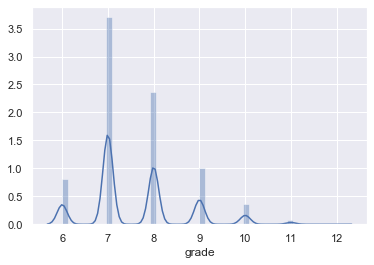

In [35]:
fig,ax = plt.subplots()
sns.distplot(df['grade'])

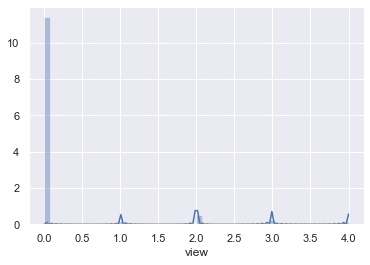

In [36]:
fig,ax = plt.subplots()
sns.distplot(df['view'])

In [37]:
q = df['view'].quantile(0.01)
df = df[df['view'] > q]

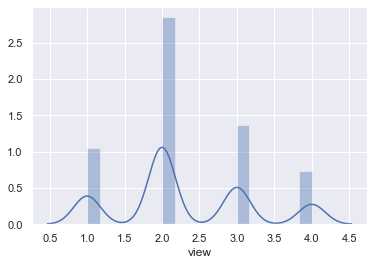

In [38]:
fig,ax = plt.subplots()
sns.distplot(df['view'])

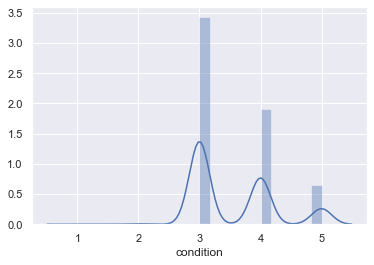

In [39]:
fig,ax = plt.subplots()
sns.distplot(df['condition'])

In [40]:
q = df['condition'].quantile(0.01)
df = df[df['condition'] > q]

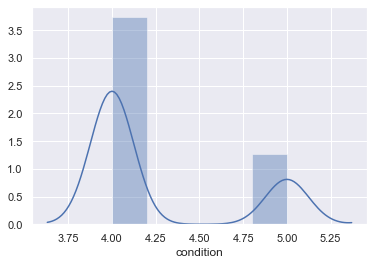

In [41]:
fig,ax = plt.subplots()
sns.distplot(df['condition'])

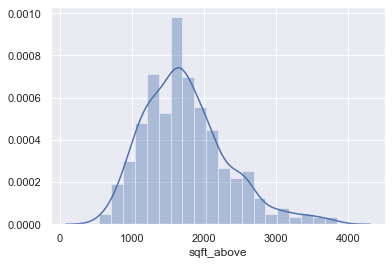

In [42]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_above'])

In [43]:
q = df['condition'].quantile(0.99)
df = df[df['condition'] < q]

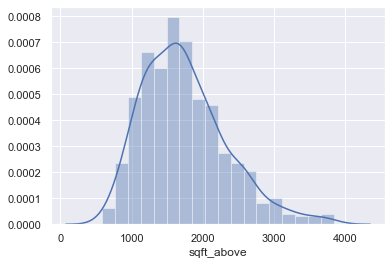

In [44]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_above'])

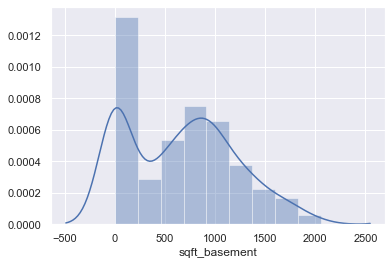

In [45]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_basement'])


In [46]:
q = df['sqft_basement'].quantile(0.99)
df = df[df['sqft_basement'] < q]

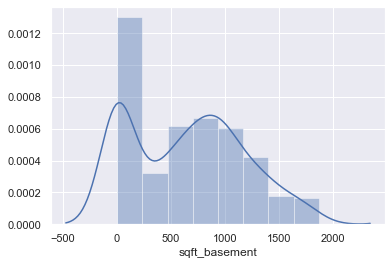

In [47]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_basement'])

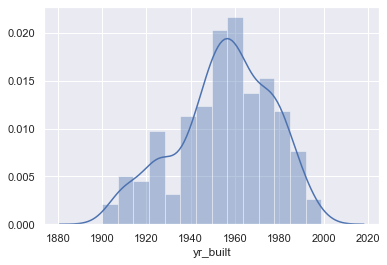

In [48]:
fig,ax = plt.subplots()
sns.distplot(df['yr_built'])

In [49]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built'] > q]

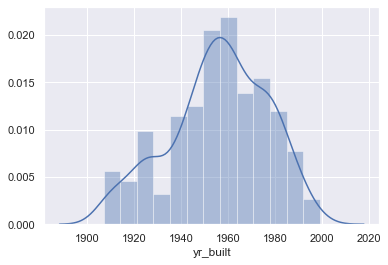

In [50]:
fig,ax = plt.subplots()
sns.distplot(df['yr_built'])

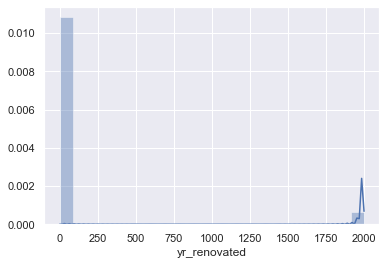

In [51]:
fig,ax = plt.subplots()
sns.distplot(df['yr_renovated'])

In [52]:
df['yr_renovated'].value_counts()

0       500
1989      3
1986      3
2001      3
1982      2
1991      2
1980      2
1997      1
1962      1
1965      1
1968      1
1969      1
1979      1
1984      1
1983      1
1996      1
2002      1
1988      1
1990      1
1992      1
1993      1
2003      1
Name: yr_renovated, dtype: int64

In [53]:
df = df.drop('yr_renovated', axis = 1)

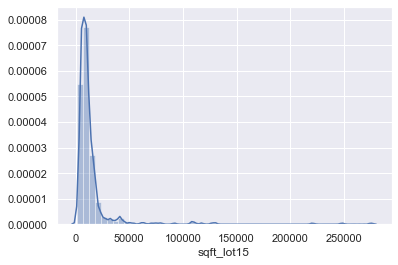

In [54]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_lot15'])

In [55]:
q = df['sqft_lot15'].quantile(0.99)
df = df[df['sqft_lot15'] < q]

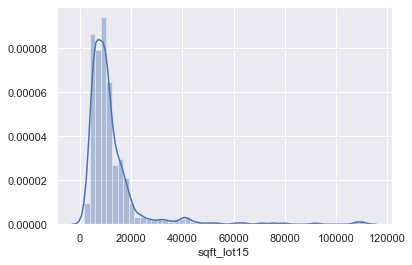

In [56]:
fig,ax = plt.subplots()
sns.distplot(df['sqft_lot15'])

In [57]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
58,951000.0,5,3.25,3250,14342,2.0,0,4,4,8,3250,0,1968,98008,47.5880,-122.116,2960,11044
60,650000.0,3,2.25,2150,21235,1.0,0,3,4,8,1590,560,1959,98166,47.4336,-122.339,2570,18900
178,269950.0,3,1.50,1950,7560,1.0,0,2,4,7,1320,630,1975,98022,47.1976,-121.999,1950,8941


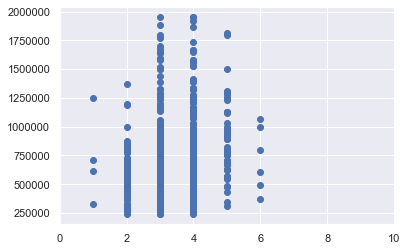

In [58]:
fig,ax = plt.subplots()
ax.scatter(df['bedrooms'], df['price'])
plt.xlim(0,10)
plt.show()

In [59]:
df['log_price'] = np.log(df['price'])

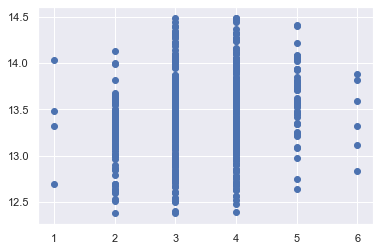

In [60]:
f,ax = plt.subplots()
ax.scatter(df['bedrooms'], df['log_price'])
plt.show()

In [61]:
df['log_bedrooms'] = np.log(df['bedrooms'])

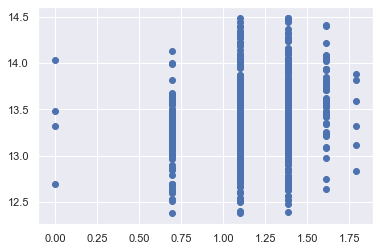

In [62]:
f,ax = plt.subplots()
ax.scatter(df['log_bedrooms'], df['log_price'])

plt.show()

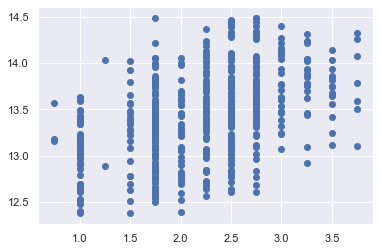

In [63]:
f,ax = plt.subplots()
ax.scatter(df['bathrooms'], df['log_price'])
plt.show()

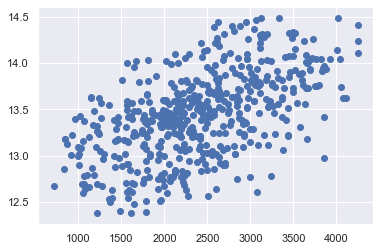

In [64]:
f,ax = plt.subplots()
ax.scatter(df['sqft_living'], df['log_price'])
plt.show()

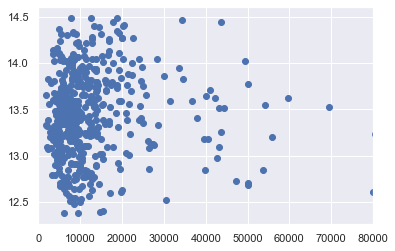

In [65]:
f,ax = plt.subplots()
ax.scatter(df['sqft_lot'], df['log_price'])
plt.xlim(-1,80000)
plt.show()

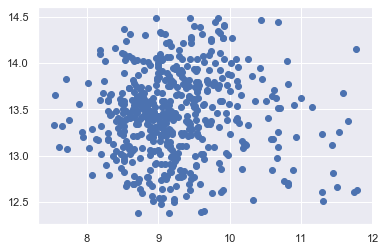

In [66]:
df['log_sqft_lot'] = np.log(df['sqft_lot'])

f,ax = plt.subplots()
ax.scatter(df['log_sqft_lot'], df['log_price'])
plt.show()

In [67]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_bedrooms,log_sqft_lot
58,951000.0,5,3.25,3250,14342,2.0,0,4,4,8,...,0,1968,98008,47.5880,-122.116,2960,11044,13.765269,1.609438,9.570948
60,650000.0,3,2.25,2150,21235,1.0,0,3,4,8,...,560,1959,98166,47.4336,-122.339,2570,18900,13.384728,1.098612,9.963406
178,269950.0,3,1.50,1950,7560,1.0,0,2,4,7,...,630,1975,98022,47.1976,-121.999,1950,8941,12.505992,1.098612,8.930626


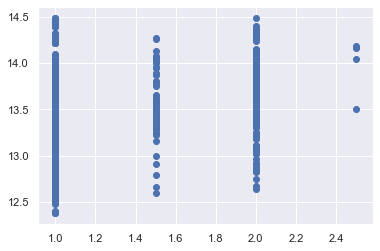

In [68]:
f,ax = plt.subplots()
ax.scatter(df['floors'], df['log_price'])
plt.show()

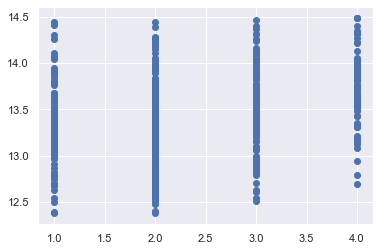

In [69]:
f,ax = plt.subplots()
ax.scatter(df['view'], df['log_price'])
plt.show()

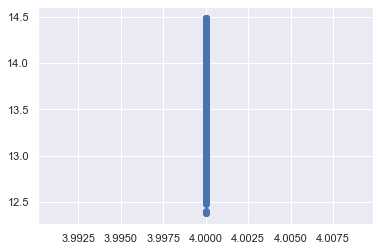

In [70]:
f,ax = plt.subplots()
ax.scatter(df['condition'], df['log_price'])
plt.show()

In [71]:
df['condition'].unique()

array([4], dtype=int64)

In [72]:
df = df.drop('condition', axis = 1)

In [73]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_bedrooms,log_sqft_lot
58,951000.0,5,3.25,3250,14342,2.0,0,4,8,3250,0,1968,98008,47.5880,-122.116,2960,11044,13.765269,1.609438,9.570948
60,650000.0,3,2.25,2150,21235,1.0,0,3,8,1590,560,1959,98166,47.4336,-122.339,2570,18900,13.384728,1.098612,9.963406
178,269950.0,3,1.50,1950,7560,1.0,0,2,7,1320,630,1975,98022,47.1976,-121.999,1950,8941,12.505992,1.098612,8.930626


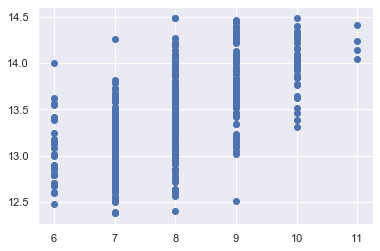

In [74]:
f,ax = plt.subplots()
ax.scatter(df['grade'], df['log_price'])
plt.show()

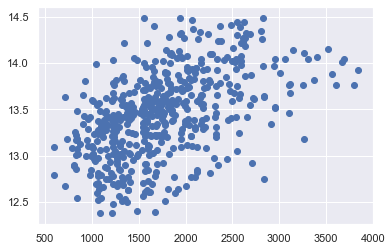

In [75]:
f,ax = plt.subplots()
ax.scatter(df['sqft_above'], df['log_price'])
plt.show()

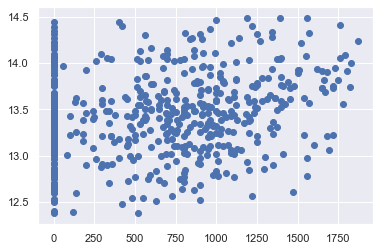

In [76]:
f,ax = plt.subplots()
ax.scatter(df['sqft_basement'], df['log_price'])
plt.show()

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


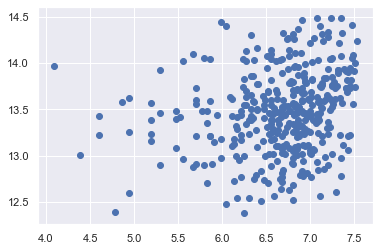

In [77]:
df['log_sqft_basement'] = np.log(df['sqft_basement'])

f,ax = plt.subplots()
ax.scatter(df['log_sqft_basement'], df['log_price'])
plt.show()

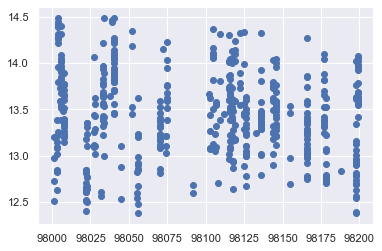

In [78]:
f,ax = plt.subplots()
ax.scatter(df['zipcode'], df['log_price'])
plt.show()

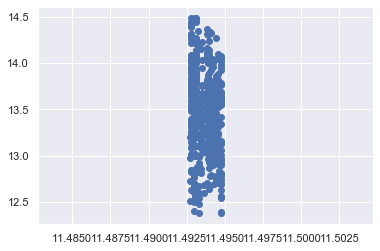

In [79]:
df['log_zipcode'] = np.log(df['zipcode'])

f,ax = plt.subplots()
ax.scatter(df['log_zipcode'], df['log_price'])
plt.show()

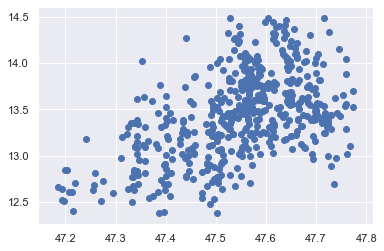

In [80]:
f,ax = plt.subplots()
ax.scatter(df['lat'], df['log_price'])
plt.show()

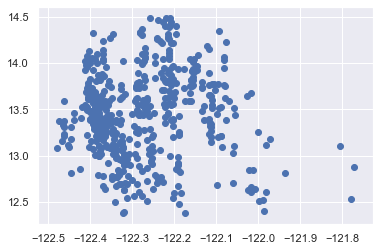

In [81]:
f,ax = plt.subplots()
ax.scatter(df['long'], df['log_price'])
plt.show()

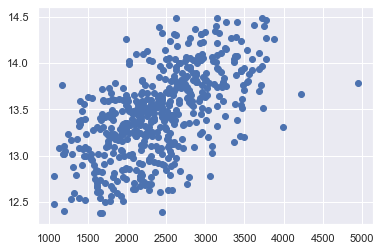

In [82]:

f,ax = plt.subplots()
ax.scatter(df['sqft_living15'], df['log_price'])
plt.show()

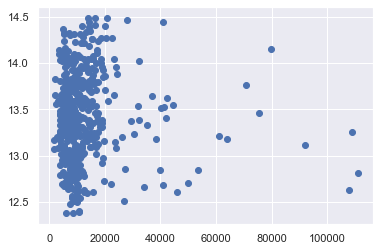

In [83]:
f,ax = plt.subplots()
ax.scatter(df['sqft_lot15'], df['log_price'])
plt.show()


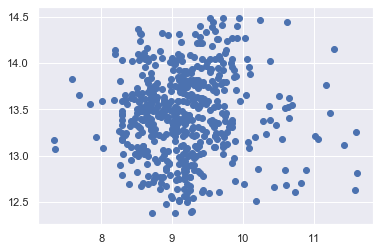

In [84]:
df['log_sqft_lot15'] = np.log(df['sqft_lot15'])

f,ax = plt.subplots()
ax.scatter(df['log_sqft_lot15'], df['log_price'])
plt.show()

In [85]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,log_price,log_bedrooms,log_sqft_lot,log_sqft_basement,log_zipcode,log_sqft_lot15
58,951000.0,5,3.25,3250,14342,2.0,0,4,8,3250,...,47.5880,-122.116,2960,11044,13.765269,1.609438,9.570948,-inf,11.492804,9.309643
60,650000.0,3,2.25,2150,21235,1.0,0,3,8,1590,...,47.4336,-122.339,2570,18900,13.384728,1.098612,9.963406,6.327937,11.494415,9.846917
178,269950.0,3,1.50,1950,7560,1.0,0,2,7,1320,...,47.1976,-121.999,1950,8941,12.505992,1.098612,8.930626,6.445720,11.492947,9.098403


In [86]:
df = df.drop(['price', 'bedrooms', 'sqft_lot', 'sqft_basement', 'zipcode', 'sqft_lot15'], axis = 1)

In [87]:
df.head(3)

,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,log_price,log_bedrooms,log_sqft_lot,log_sqft_basement,log_zipcode,log_sqft_lot15
58,3.25,3250,2.0,0,4,8,3250,1968,47.5880,-122.116,2960,13.765269,1.609438,9.570948,-inf,11.492804,9.309643
60,2.25,2150,1.0,0,3,8,1590,1959,47.4336,-122.339,2570,13.384728,1.098612,9.963406,6.327937,11.494415,9.846917
178,1.50,1950,1.0,0,2,7,1320,1975,47.1976,-121.999,1950,12.505992,1.098612,8.930626,6.445720,11.492947,9.098403


In [88]:
df.columns.values


array(['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15',
       'log_price', 'log_bedrooms', 'log_sqft_lot', 'log_sqft_basement',
       'log_zipcode', 'log_sqft_lot15'], dtype=object)

In [89]:
df.describe()

,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,log_price,log_bedrooms,log_sqft_lot,log_sqft_basement,log_zipcode,log_sqft_lot15
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,2.197519,2400.578244,1.309160,0.064885,2.311069,7.979008,1746.658397,1955.730916,47.548864,-122.277302,2402.763359,13.443333,1.194035,9.236321,-inf,11.493688,9.181567
std,0.662513,749.223417,0.435991,0.246559,0.932006,1.029924,596.866809,20.638890,0.120987,0.116355,608.639869,0.458840,0.291359,0.717628,NaN,0.000650,0.617167
min,0.750000,710.000000,1.000000,0.000000,1.000000,6.000000,590.000000,1907.000000,47.185300,-122.479000,1060.000000,12.380026,0.000000,7.544332,-inf,11.492733,7.333676
25%,1.750000,1897.500000,1.000000,0.000000,2.000000,7.000000,1300.000000,1943.000000,47.490875,-122.372000,1980.000000,13.116294,1.098612,8.747550,-inf,11.493059,8.737973
50%,2.250000,2380.000000,1.000000,0.000000,2.000000,8.000000,1660.000000,1958.000000,47.564200,-122.291500,2385.000000,13.452027,1.098612,9.145695,6.551080,11.493896,9.159205
75%,2.750000,2942.500000,1.500000,0.000000,3.000000,9.000000,2082.500000,1973.000000,47.640725,-122.207000,2790.000000,13.763427,1.386294,9.557749,6.927558,11.494191,9.488494
max,3.750000,4250.000000,2.500000,1.000000,4.000000,11.000000,3840.000000,1998.000000,47.774500,-121.771000,4950.000000,14.485901,1.791759,11.787150,7.533694,11.494751,11.617988


In [90]:
df.drop('log_sqft_basement', inplace = True, axis =1)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = df[['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15',
        'log_bedrooms', 'log_sqft_lot',
       'log_zipcode', 'log_sqft_lot15']]
X = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1]) ]
vif['features'] = X.columns
vif

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF,features
0,5.203402e+08,const
1,2.167460e+00,bathrooms
2,4.066419e+00,sqft_living
3,1.865710e+00,floors
4,1.413360e+00,waterfront
5,1.313517e+00,view
6,2.544804e+00,grade
7,3.644434e+00,sqft_above
8,1.747467e+00,yr_built
9,1.491878e+00,lat


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15',
        'log_bedrooms', 'log_sqft_lot',
       'log_zipcode', 'log_sqft_lot15']]
X['intercept'] = 1
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1]) ]
vif['features'] = X.columns
vif

,VIF,features
0,2.167460e+00,bathrooms
1,4.066419e+00,sqft_living
2,1.865710e+00,floors
3,1.413360e+00,waterfront
4,1.313517e+00,view
5,2.544804e+00,grade
6,3.644434e+00,sqft_above
7,1.747467e+00,yr_built
8,1.491878e+00,lat
9,1.770909e+00,long


In [93]:
df1 = df

In [94]:
y = df1['log_price']
x = df1.drop(['log_price'], axis = 1)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
scaled_x = scaler.transform(x)

In [115]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x,y, test_size = 0.2, random_state = 47)

In [116]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
y_hat = reg.predict(x_train)

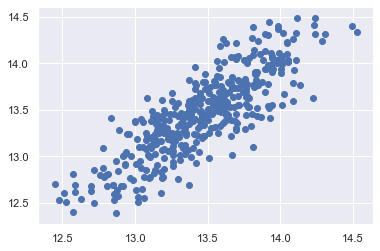

In [118]:
plt.scatter(y_hat,y_train)

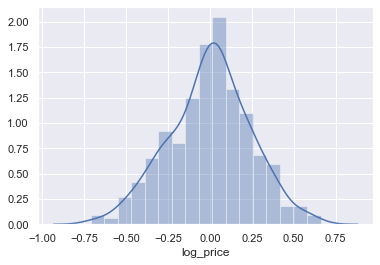

In [119]:
sns.distplot(y_train - y_hat)

In [120]:
reg.score(x_train,y_train)

0.7033811215446677

In [121]:
reg.intercept_

13.445208010828825

In [122]:
reg.coef_

array([ 0.04089055,  0.06495665,  0.00245441,  0.09753837,  0.02728895,
        0.12292376,  0.04028668, -0.07770961,  0.18471631, -0.01511389,
        0.09194204, -0.01120621,  0.00842975, -0.05191598, -0.01210533])

In [123]:
summary = pd.DataFrame(data = x.columns.values, columns = ['features'])
summary['bias'] = reg.intercept_
summary['weights'] = reg.coef_
summary

,features,bias,weights
0,bathrooms,13.445208,0.040891
1,sqft_living,13.445208,0.064957
2,floors,13.445208,0.002454
3,waterfront,13.445208,0.097538
4,view,13.445208,0.027289
5,grade,13.445208,0.122924
6,sqft_above,13.445208,0.040287
7,yr_built,13.445208,-0.077710
8,lat,13.445208,0.184716
9,long,13.445208,-0.015114


In [124]:
y_hat_test = reg.predict(x_test)
y_hat_test

array([14.20864514, 13.66121785, 13.23947059, 13.25137376, 13.23736346,
       13.0522309 , 13.26509014, 12.78170969, 13.37952076, 13.58509464,
       13.19176861, 13.00550639, 13.10295914, 13.55154694, 13.31128682,
       13.21753301, 13.17303499, 13.93124669, 13.87253767, 13.42331564,
       13.49500785, 13.040882  , 13.66137072, 13.90004706, 13.14489206,
       12.91544569, 13.862451  , 13.60808309, 13.81112548, 13.51506252,
       13.7950396 , 13.29427249, 13.39107331, 13.65457578, 13.55093324,
       12.99866668, 13.14778879, 13.63035583, 12.70523697, 13.74274118,
       13.18690692, 13.02774332, 13.09659134, 13.19036364, 13.80146022,
       14.23469062, 12.94114434, 12.84940432, 13.22704664, 13.73936932,
       14.08414138, 12.97556511, 13.44045246, 13.23837579, 14.03001697,
       13.39315966, 12.86978985, 13.8543142 , 14.43800176, 12.96506893,
       14.03590285, 13.61185292, 13.8895385 , 12.52713608, 13.73669254,
       13.4905792 , 13.66957055, 12.64825183, 13.19089847, 13.37

In [125]:
reg.score(x_test,y_hat_test)

1.0

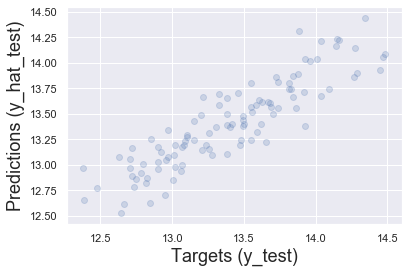

In [126]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.show()

In [108]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,5.299095e+05
1,3.242470e+05
2,8.233542e+05
3,4.950475e+05
4,1.220721e+06


In [109]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    13.159659
1    12.628067
2    13.783049
3    12.923912
4    14.006131
Name: log_price, dtype: float64

In [110]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,5.299095e+05,519000.0
1,3.242470e+05,305000.0
2,8.233542e+05,968060.0
3,4.950475e+05,410000.0
4,1.220721e+06,1210000.0
...,...,...
100,4.779357e+05,495000.0
101,1.017893e+06,1575000.0
102,1.298190e+06,1662000.0
103,7.571449e+05,765000.0


In [111]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [112]:
df_pf

,Prediction,Target,Residual
0,5.299095e+05,519000.0,-10909.473507
1,3.242470e+05,305000.0,-19247.039273
2,8.233542e+05,968060.0,144705.762110
3,4.950475e+05,410000.0,-85047.511677
4,1.220721e+06,1210000.0,-10721.413332
...,...,...,...
100,4.779357e+05,495000.0,17064.344624
101,1.017893e+06,1575000.0,557106.748662
102,1.298190e+06,1662000.0,363810.422664
103,7.571449e+05,765000.0,7855.085449
